# <font color='blue'>NERD DOS DADOS - Machine Learning Clusterização</font>

# <font color='blue'>Agrupamento de Clientes Por Consumo de Energia</font>

A partir de dados de consumo de energia de clientes, nosso trabalho é agrupar os consumidores por similaridade a afim de compreender o comportamento dos clientes e sua relação com o consumo de energia.

Arquivo de dados: https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Carregando os dados
dataset = pd.read_csv('consumo_energia.txt', delimiter = ';')

In [3]:
# Visualizando informações sobre o dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [4]:
dataset.head()

Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0

In [5]:
dataset.shape

(2075259, 9)

In [6]:
dataset.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [7]:
# Checando se há valores missing
dataset.isnull().values.any()

True

In [8]:
# Remove os registros com valores NA e remove as duas primeiras colunas (não são necessárias)
dataset = dataset.iloc[0:, 2:9].dropna()

In [9]:
dataset['Voltage'] = dataset['Voltage'].astype(dtype = 'float64')
dataset['Global_active_power'] = dataset['Global_active_power'].astype(dtype = 'float64')
dataset['Global_reactive_power'] = dataset['Global_reactive_power'].astype(dtype = 'float64')
dataset['Global_intensity'] = dataset['Global_intensity'].astype(dtype = 'float64')
dataset['Sub_metering_1'] = dataset['Sub_metering_1'].astype(dtype = 'float64')
dataset['Sub_metering_2'] = dataset['Sub_metering_2'].astype(dtype = 'float64')
dataset['Sub_metering_3'] = dataset['Sub_metering_3'].astype(dtype = 'float64')

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 125.1 MB


In [11]:
dataset.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                4.216                  0.418   234.84              18.4   
1                5.360                  0.436   233.63              23.0   
2                5.374                  0.498   233.29              23.0   
3                5.388                  0.502   233.74              23.0   
4                3.666                  0.528   235.68              15.8   

   Sub_metering_1  Sub_metering_2  Sub_metering_3  
0             0.0             1.0            17.0  
1             0.0             1.0            16.0  
2             0.0             2.0            17.0  
3             0.0             1.0            17.0  
4             0.0             1.0            17.0

In [12]:
# Checando se há valores missing
dataset.isnull().values.any()

False

In [13]:
# Obtém os valores dos atributos. Neste caso as variaveis foram carregadas como categorias (object) entao iremos extrair os valores... 
dataset_atrib = dataset.values

In [14]:
dataset_atrib

array([[  4.216,   0.418, 234.84 , ...,   0.   ,   1.   ,  17.   ],
       [  5.36 ,   0.436, 233.63 , ...,   0.   ,   1.   ,  16.   ],
       [  5.374,   0.498, 233.29 , ...,   0.   ,   2.   ,  17.   ],
       ...,
       [  0.938,   0.   , 239.82 , ...,   0.   ,   0.   ,   0.   ],
       [  0.934,   0.   , 239.7  , ...,   0.   ,   0.   ,   0.   ],
       [  0.932,   0.   , 239.55 , ...,   0.   ,   0.   ,   0.   ]])

In [15]:
# Coleta uma amostra de 1% dos dados para não comprometer a memória do computador
amostra1, amostra2 = train_test_split(dataset_atrib, train_size = .01)

In [16]:
amostra1.shape

(20492, 7)

In [17]:
# Aplica redução de dimensionalidade
# Transforma as 7 variáveis em 2 variaveis principais. Esse método utiliza Algebra Linear pra identificar semelhança 
# entre os dados e assim "juntar" as variaveis, medindo a semelhança pela variância.
pca = PCA(n_components = 2).fit_transform(amostra1)

In [18]:
# Determinando um range de K
k_range = range(1,12)

In [19]:
# Aplicando o modelo K-Means para cada valor de K (esta célula pode levar bastante tempo para ser executada)
k_means_var = [KMeans(n_clusters = k).fit(pca) for k in k_range]

In [20]:
# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

In [21]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [22]:
# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

In [23]:
# Soma total dos quadrados
soma_total = sum(pdist(pca)**2)/pca.shape[0]

In [24]:
# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

In [25]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

Text(0.5, 1.0, 'Variância Explicada x Valor de K')

In [26]:
# Criando um modelo com K = 8
modelo_v1 = KMeans(n_clusters = 8)
modelo_v1.fit(pca)

KMeans()

In [27]:
# Obtém os valores mínimos e máximos e organiza o shape
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1
y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = modelo_v1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

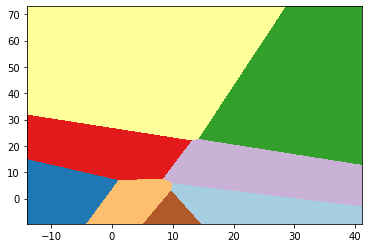

In [28]:
# Plot das áreas dos clusters
plt.figure(1)
plt.clf()
plt.imshow(Z, 
           interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto', 
           origin = 'lower')

In [29]:
# Plot dos centróides
plt.plot(pca[:, 0], pca[:, 1], 'k.', markersize = 4)
centroids = modelo_v1.cluster_centers_
inert = modelo_v1.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
#?silhouette_score

In [30]:
# Silhouette Score
labels = modelo_v1.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.7663630976483758

In [31]:
# Criando um modelo com K = 10
modelo_v2 = KMeans(n_clusters = 10)
modelo_v2.fit(pca)

KMeans(n_clusters=10)

In [32]:
# Obtém os valores mínimos e máximos e organiza o shape
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1
y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = modelo_v2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [33]:
# Plot das áreas dos clusters
plt.figure(1)
plt.clf()
plt.imshow(Z, 
           interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto', 
           origin = 'lower')

In [34]:
# Plot dos centróides
plt.plot(pca[:, 0], pca[:, 1], 'k.', markersize = 4)
centroids = modelo_v2.cluster_centers_
inert = modelo_v2.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [35]:
# Silhouette Score -- utilizamos para avaliar se o numero de cluster é o ideal... mais proximo de 1 melhor... e -1 pior...
labels = modelo_v2.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.6554822713289833

Criando o Cluster Map com os clusters do Modelo V1 que apresentou melhor Silhouette Score.

In [36]:
# Lista com nomes das colunas
names = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

In [37]:
# Cria o cluster map
cluster_map = pd.DataFrame(amostra1, columns = names)
cluster_map['Global_active_power'] = pd.to_numeric(cluster_map['Global_active_power'])
cluster_map['cluster'] = modelo_v1.labels_

In [38]:
cluster_map

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                    0.336                  0.224   232.45               1.6   
1                    1.488                  0.334   240.32               6.2   
2                    0.560                  0.054   236.79               2.4   
3                    1.362                  0.176   241.42               5.6   
4                    0.714                  0.216   243.03               3.2   
...                    ...                    ...      ...               ...   
20487                0.228                  0.086   240.99               1.0   
20488                0.310                  0.128   237.67               1.4   
20489                1.432                  0.000   241.18               6.0   
20490                1.458                  0.000   243.58               6.0   
20491                1.284                  0.078   241.14               5.2   

       Sub_metering_1  Sub_metering_2  Sub_metering_3  cluster  
0                 0.0             2.0             0.0        1  
1                 0.0             2.0            19.0        7  
2                 0.0             0.0             1.0        1  
3                 0.0             0.0            18.0        7  
4                 0.0             0.0             0.0        1  
...               ...             ...             ...      ...  
20487             0.0             1.0             0.0        1  
20488             0.0             0.0             0.0        1  
20489             1.0             0.0            18.0        7  
20490             0.0             0.0            18.0        7  
20491             0.0             0.0            18.0        7  

[20492 rows x 8 columns]

In [39]:
# Calcula a média de consumo de energia por cluster
cluster_map.groupby('cluster')['Global_active_power'].mean()

cluster
0    2.927980
1    0.514547
2    4.651433
3    2.532889
4    1.157566
5    3.707469
6    3.510096
7    1.612363
Name: Global_active_power, dtype: float64

In [40]:
# Calcula a quantidade de observacoes por cluster
cluster_map.groupby('cluster')['Global_active_power'].count()

cluster
0      999
1    12942
2      349
3      225
4      438
5      294
6      208
7     5037
Name: Global_active_power, dtype: int64

### Gerando Cluster com dados normalizados

In [41]:
# Obtém os valores dos atributos. Neste caso as variaveis foram carregadas como categorias (object) entao iremos extrair os valores... 
dataset_atrib = dataset.values

# Importa biblioteca para fazer a normalizacao
from sklearn.preprocessing import MinMaxScaler

# Cria o objeto para normalizar e faz a normalizacao dos dados
Padronizador = MinMaxScaler()
dataset_atrib = Padronizador.fit_transform(dataset_atrib)


amostra1, amostra2 = train_test_split(dataset_atrib, train_size = .01)
pca = PCA(n_components = 2).fit_transform(amostra1)
k_range = range(1,12)
k_means_var = [KMeans(n_clusters = k).fit(pca) for k in k_range]
centroids = [X.cluster_centers_ for X in k_means_var]
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]
soma_total = sum(pdist(pca)**2)/pca.shape[0]
# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster
# Criando um modelo com K = 8
modelo_v1 = KMeans(n_clusters = 8)
modelo_v1.fit(pca)
# Obtém os valores mínimos e máximos e organiza o shape
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1
y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = modelo_v1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Silhouette Score
labels = modelo_v1.labels_
silhouette_score(pca, labels, metric = 'euclidean')
# Lista com nomes das colunas
names = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Cria o cluster map
cluster_map = pd.DataFrame(amostra1, columns = names)
cluster_map['Global_active_power'] = pd.to_numeric(cluster_map['Global_active_power'])
cluster_map['cluster'] = modelo_v1.labels_
cluster_map

Global_active_power  Global_reactive_power   Voltage  Global_intensity  \
0                 0.156075               0.284892  0.636511          0.153527   
1                 0.214738               0.000000  0.360582          0.211618   
2                 0.273402               0.168345  0.543780          0.261411   
3                 0.024986               0.080576  0.603554          0.024896   
4                 0.035488               0.176978  0.487561          0.041494   
...                    ...                    ...       ...               ...   
20487             0.141228               0.158273  0.510501          0.136929   
20488             0.015390               0.000000  0.703716          0.016598   
20489             0.024262               0.066187  0.581583          0.024896   
20490             0.144668               0.041727  0.565105          0.136929   
20491             0.011950               0.092086  0.552827          0.016598   

       Sub_metering_1  Sub_metering_2  Sub_metering_3  cluster  
0            0.011364          0.0125        0.612903        4  
1            0.000000          0.0000        0.000000        5  
2            0.000000          0.0125        0.580645        1  
3            0.000000          0.0000        0.032258        0  
4            0.000000          0.0000        0.032258        0  
...               ...             ...             ...      ...  
20487        0.000000          0.0000        0.419355        1  
20488        0.000000          0.0000        0.000000        6  
20489        0.000000          0.0000        0.032258        0  
20490        0.000000          0.0125        0.612903        4  
20491        0.000000          0.0000        0.000000        0  

[20492 rows x 8 columns]

In [42]:
# Calcula da quantidade de observações por cluster
cluster_map.groupby('cluster')['Global_active_power'].count()

cluster
0    6209
1    2002
2     646
3     421
4    4278
5    1714
6    5057
7     165
Name: Global_active_power, dtype: int64